本节介绍如何通过深度学习框架来简介实现线性回归模型

## 1 生成数据集

In [6]:
from mxnet import autograd, gluon, np, npx
from d2l import mxnet as d2l

npx.set_np()

In [9]:
true_w = np.array([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

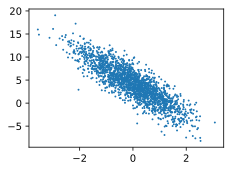

In [10]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].asnumpy(), labels.asnumpy(), 1);

## 2 读取数据集

先构造一个Gluon数据迭代器， 此外，布尔值 `is_train` 便是是否希望数据迭代器对象在每个迭代周期内打乱数据

In [11]:
def load_array(data_arrays, batch_size, is_train=True): #@save
    dataset = gluon.data.ArrayDataset(*data_arrays)
    return gluon.data.DataLoader(dataset, batch_size, shuffle=is_train)

In [12]:
batch_size = 10
data_iter = load_array((features, labels), batch_size)

In [13]:
next(iter(data_iter))

[array([[ 0.624086  ,  1.0005604 ],
        [-1.3545007 ,  0.38881665],
        [ 0.40816668, -1.2295864 ],
        [ 0.9431827 , -0.17825997],
        [ 0.5785553 , -1.3847297 ],
        [ 1.5684959 ,  1.1623417 ],
        [ 1.780596  ,  0.6125229 ],
        [ 0.7037153 ,  0.807092  ],
        [-1.4986924 ,  0.97777593],
        [ 0.51309216, -0.12743944]]),
 array([[ 2.0267735 ],
        [ 0.17159969],
        [ 9.207351  ],
        [ 6.6979027 ],
        [10.062589  ],
        [ 3.3801622 ],
        [ 5.696231  ],
        [ 2.873134  ],
        [-2.1083777 ],
        [ 5.6516786 ]])]

## 3 定义模型


In [14]:
from mxnet.gluon import nn

net = nn.Sequential()
net.add(nn.Dense(1))

# 4 初始化模型参数

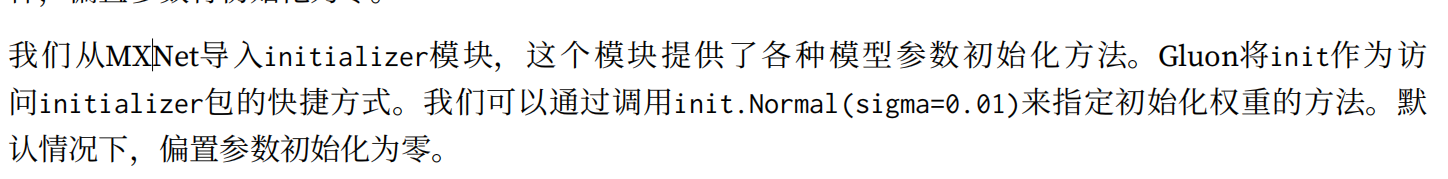

In [15]:
from mxnet import init

net.initialize(init.Normal(sigma=0.01))

# 5 定义损失函数 
在Gluon中，loss模块定义了各种损失函数。在这个例子中，我们将使用Gluon中的均方误差(L2Loss)

In [16]:
loss = gluon.loss.L2Loss()

# 6 定义优化算法

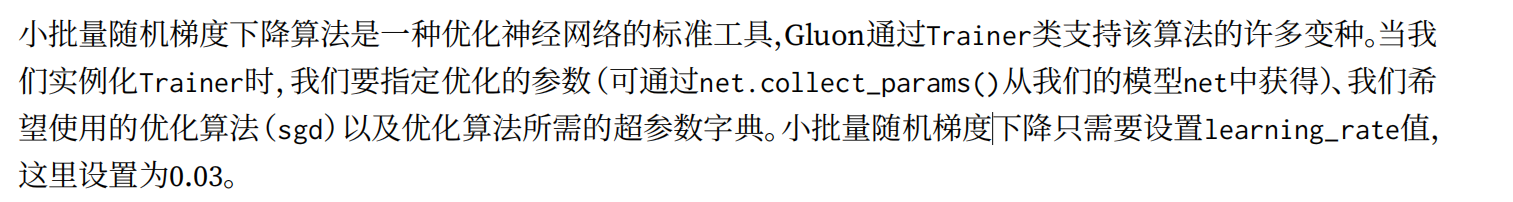

In [17]:
from mxnet import gluon

trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.03})

# 7 训练

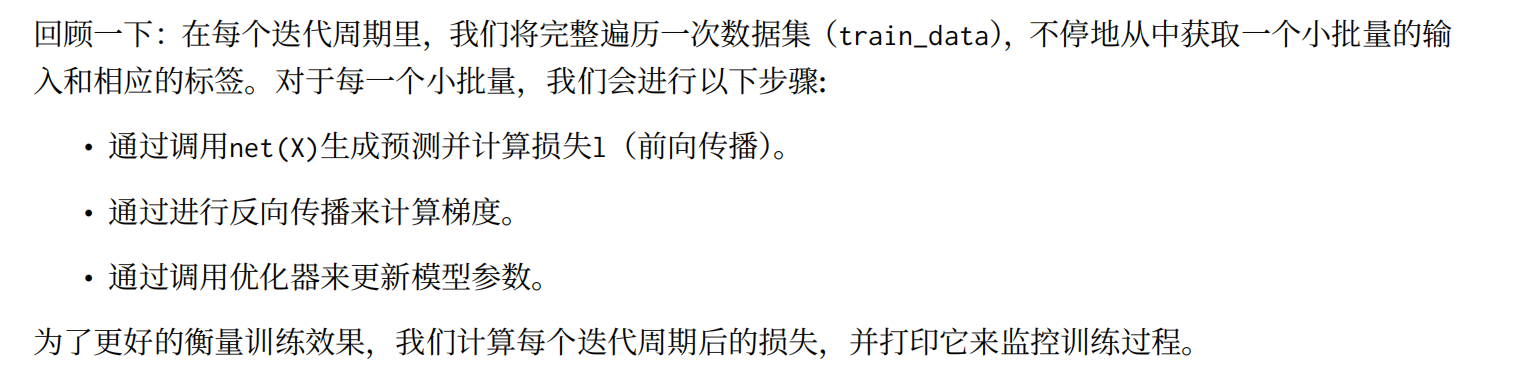

In [18]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        with autograd.record():
            l = loss(net(X), y)
        l.backward()
        trainer.step(batch_size)
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l.mean().asnumpy():f}')

epoch 1, loss 0.000141
epoch 2, loss 0.000051
epoch 3, loss 0.000051


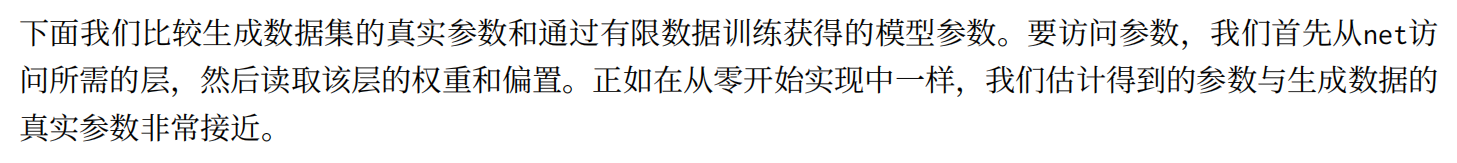

In [21]:
w = net[0].weight.data()
print(f'w的估计误差: {abs(true_w - w.reshape(true_w.shape))}')
b = net[0].bias.data()
print(f'b的估计误差: {abs(true_b - b)}')

w的估计误差: [8.7022781e-05 8.2969666e-05]
b的估计误差: [0.00036716]
